In [7]:
from scipy.stats import norm, uniform
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, pi

In [17]:
def g(x):
    return exp(-0.5*(x**2))

def MC1(x,y):
    u_val = uniform.rvs(0,1, size = y)
    u_val = [g(x*u_val[i]) for i in range(len(u_val))]
    u_exp = sum(u_val)/len(u_val)
    return (x/sqrt(2*pi))*u_exp

def MC2(x,y):
    z_val = norm.rvs(0,1, size = y)
    z_val = [1 if 0 < z_val[i] < x else 0 for i in range(len(z_val))]
    return sum(z_val)/len(z_val)

def I(x):
    return integrate.quad(lambda t: (1/sqrt(2*pi))*g(t), 0, x)[0]

In [18]:
u_val1 = uniform.rvs(0,1, size = 1000)
u_val1 = [g(u_val1[i]) for i in range(1000)]
u_exp1 = sum(u_val1)/1000
var1 = (1/999000)*sum([(g(u_val1[i]) - g(u_exp1))**2 for i in range(1000)])
print(f"Standard Deviation for Monte Carlo Approximator is {round(sqrt(var1),6)}")

Standard Deviation for Monte Carlo Approximator is 0.002272


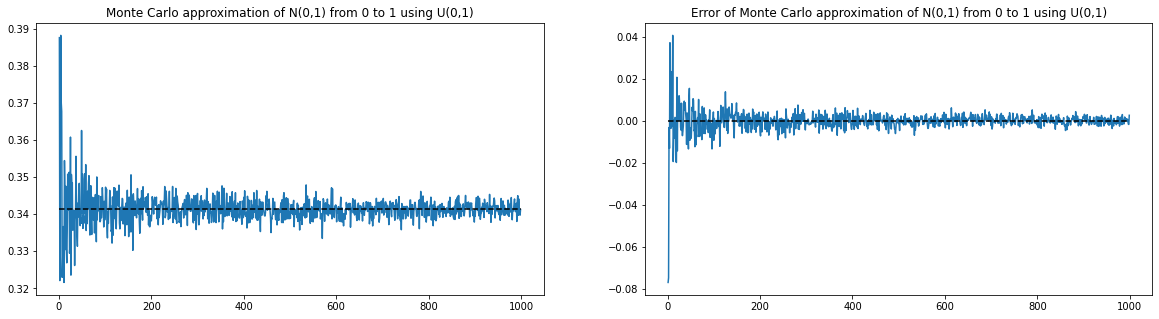

In [19]:
plt.figure(figsize=(20,5))
n_vals = [i for i in range(1,1000)]
plt.subplot(1,2,1)
plt.plot(n_vals, [MC1(1, n_vals[j]) for j in range(len(n_vals))])
plt.plot(n_vals, [I(1) for i in range(1, 1000)], c = "black", ls = "--")
plt.title("Monte Carlo approximation of N(0,1) from 0 to 1 using U(0,1)")
plt.subplot(1,2,2)
plt.plot(n_vals, [(MC1(1, n_vals[j])-I(1)) for j in range(len(n_vals))])
plt.plot(n_vals, [0 for i in range(1, 1000)], c = "black", ls = "--")
plt.title("Error of Monte Carlo approximation of N(0,1) from 0 to 1 using U(0,1)")
plt.show()

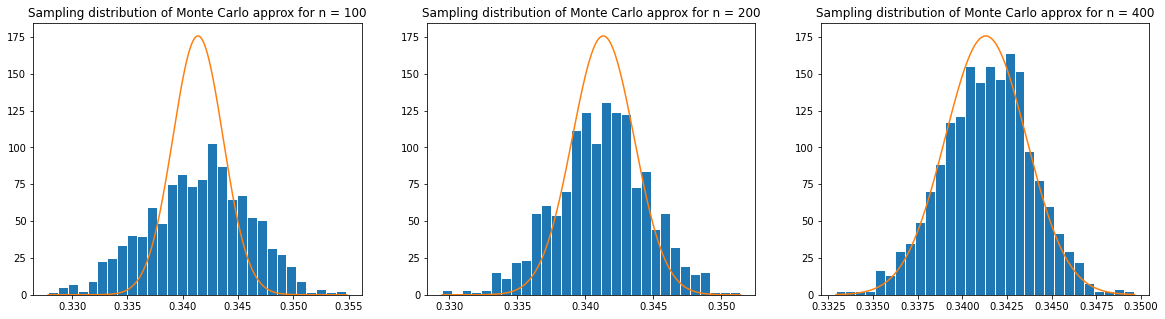

In [20]:
plt.figure(figsize=(20,5))
num = [100,200,400]
for k in range(len(num)):
    mean = []
    for j in range(1000):
        x = uniform.rvs(0,1, size = num[k])
        gx = [g(1*x[i]) for i in range(num[k])]
        gx_mean = sum(gx)/len(gx)
        mean.append((1/sqrt(2*pi))*gx_mean)
    x_pdf = np.linspace(min(mean), max(mean), num=1000)
    y_pdf = norm.pdf(x_pdf ,MC1(1,1000000), sqrt(var1))
    plt.subplot(1,3,k+1)
    plt.hist(mean, bins = 30, density=True, rwidth = 0.9, stacked= True)
    plt.plot(x_pdf, y_pdf)
    plt.title(f"Sampling distribution of Monte Carlo approx for n = {num[k]}")

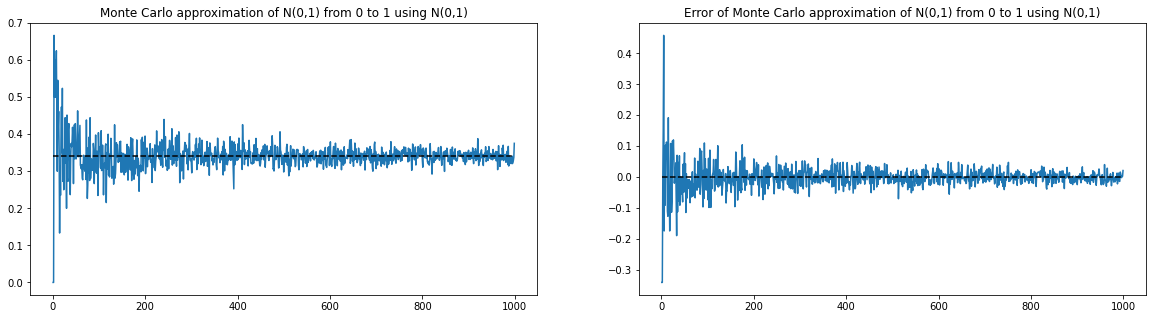

In [21]:
plt.figure(figsize=(20,5))
n_vals = [i for i in range(1,1000)]
plt.subplot(1,2,1)
plt.plot(n_vals, [MC2(1, n_vals[j]) for j in range(len(n_vals))])
plt.plot(n_vals, [I(1) for i in range(1, 1000)], c = "black", ls = "--")
plt.title("Monte Carlo approximation of N(0,1) from 0 to 1 using N(0,1)")
plt.subplot(1,2,2)
plt.plot(n_vals, [(MC2(1, n_vals[j])-I(1)) for j in range(len(n_vals))])
plt.plot(n_vals, [0 for i in range(1, 1000)], c = "black", ls = "--")
plt.title("Error of Monte Carlo approximation of N(0,1) from 0 to 1 using N(0,1)")
plt.show()